# Gym Crowdedness Analysis with PCA

> # Objective : 

To **predict** how crowded a university gym would be at a given time of day (and some other features, including weather)

> # Data Decription : 

The dataset consists of 26,000 people counts (about every 10 minutes) over one year. The dataset also contains information about the weather and semester-specific information that might affect how crowded it is. The label is the number of people, which has to be predicted given some subset of the features.

**Label**:

- Number of people

**Features**:

     1. date (string; datetime of data)
     2. timestamp (int; number of seconds since beginning of day)
     3. dayofweek (int; 0 [monday] - 6 [sunday])
     4. is_weekend (int; 0 or 1) [boolean, if 1, it's either saturday or sunday, otherwise 0]
     5. is_holiday (int; 0 or 1) [boolean, if 1 it's a federal holiday, 0 otherwise]
     6. temperature (float; degrees fahrenheit)
     7. isstartof_semester (int; 0 or 1) [boolean, if 1 it's the beginning of a school semester, 0 otherwise]
     8. month (int; 1 [jan] - 12 [dec])
     9. hour (int; 0 - 23)

> # Approach

The model would be built and PCA would be implemented in the following way : 

- **Data Cleaning and PreProcessing**
- **Exploratory Data Analysis :**
  
      - Uni-Variate Analysis : Histograms , Distribution Plots
      - Bi-Variate Analysis : Pair Plots
      - Correlation Matrix
      
- **Processing :**
      
      - OneHotEncoding 
      - Feature Scaling : Standard Scaler

- **Splitting Dataset** 
- **Principal Component Analysis**
- **Modelling : Random Forest**

      - Random forest without PCA
      - Random Forest with PCA
      
- **Conclusion**

## `1` Data Cleaning and PreProcessing 

**Importing Libraries and loading Dataset**

In [223]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas.plotting import scatter_matrix
import datetime

In [119]:
df=pd.read_csv(r'D:\amol_lap_data\python_tutor\Jupyter\Projects\Gym_Crowd_Analysis\PCA analysis.csv') #Replace it with your path where the data file is stored


In [120]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


**TASK : Print the `info()` of the dataset**

In [121]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB
None


**TASK : Describe the dataset using `describe()`**

In [122]:
#print(df.describe())
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


**TASK : Convert temperature in farenheit into celsius scale using the formula `Celsius=(Fahrenheit-32)* (5/9)`**

In [123]:
df['temperature'] = (df['temperature'] -32) * 5/9
# df.temperature = df.temperature.apply(lambda x : (5/9)*(x-32))

**TASK : Convert the timestamp into hours in 12 h format as its currently in seconds and drop `date` coulmn**

In [124]:
df['timestamp'] = abs((df['timestamp']/3600) - 12)
df.drop(columns='date',axis=1,inplace=True)

## `2` Exploratory Data Analysis

### `2.1` Uni-Variate and Bi-Variate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F38BAFBBC8>,
      dtype=object)

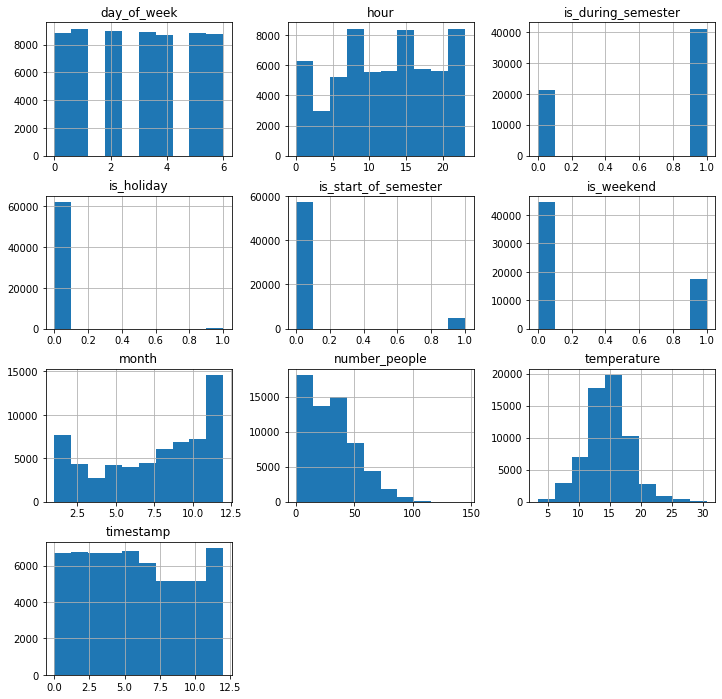

In [125]:
df.hist(figsize=(12,12))

- **Pair Plots**

**TASK : Use `pairplot()` to make different pair scatter plots of the entire dataframe**

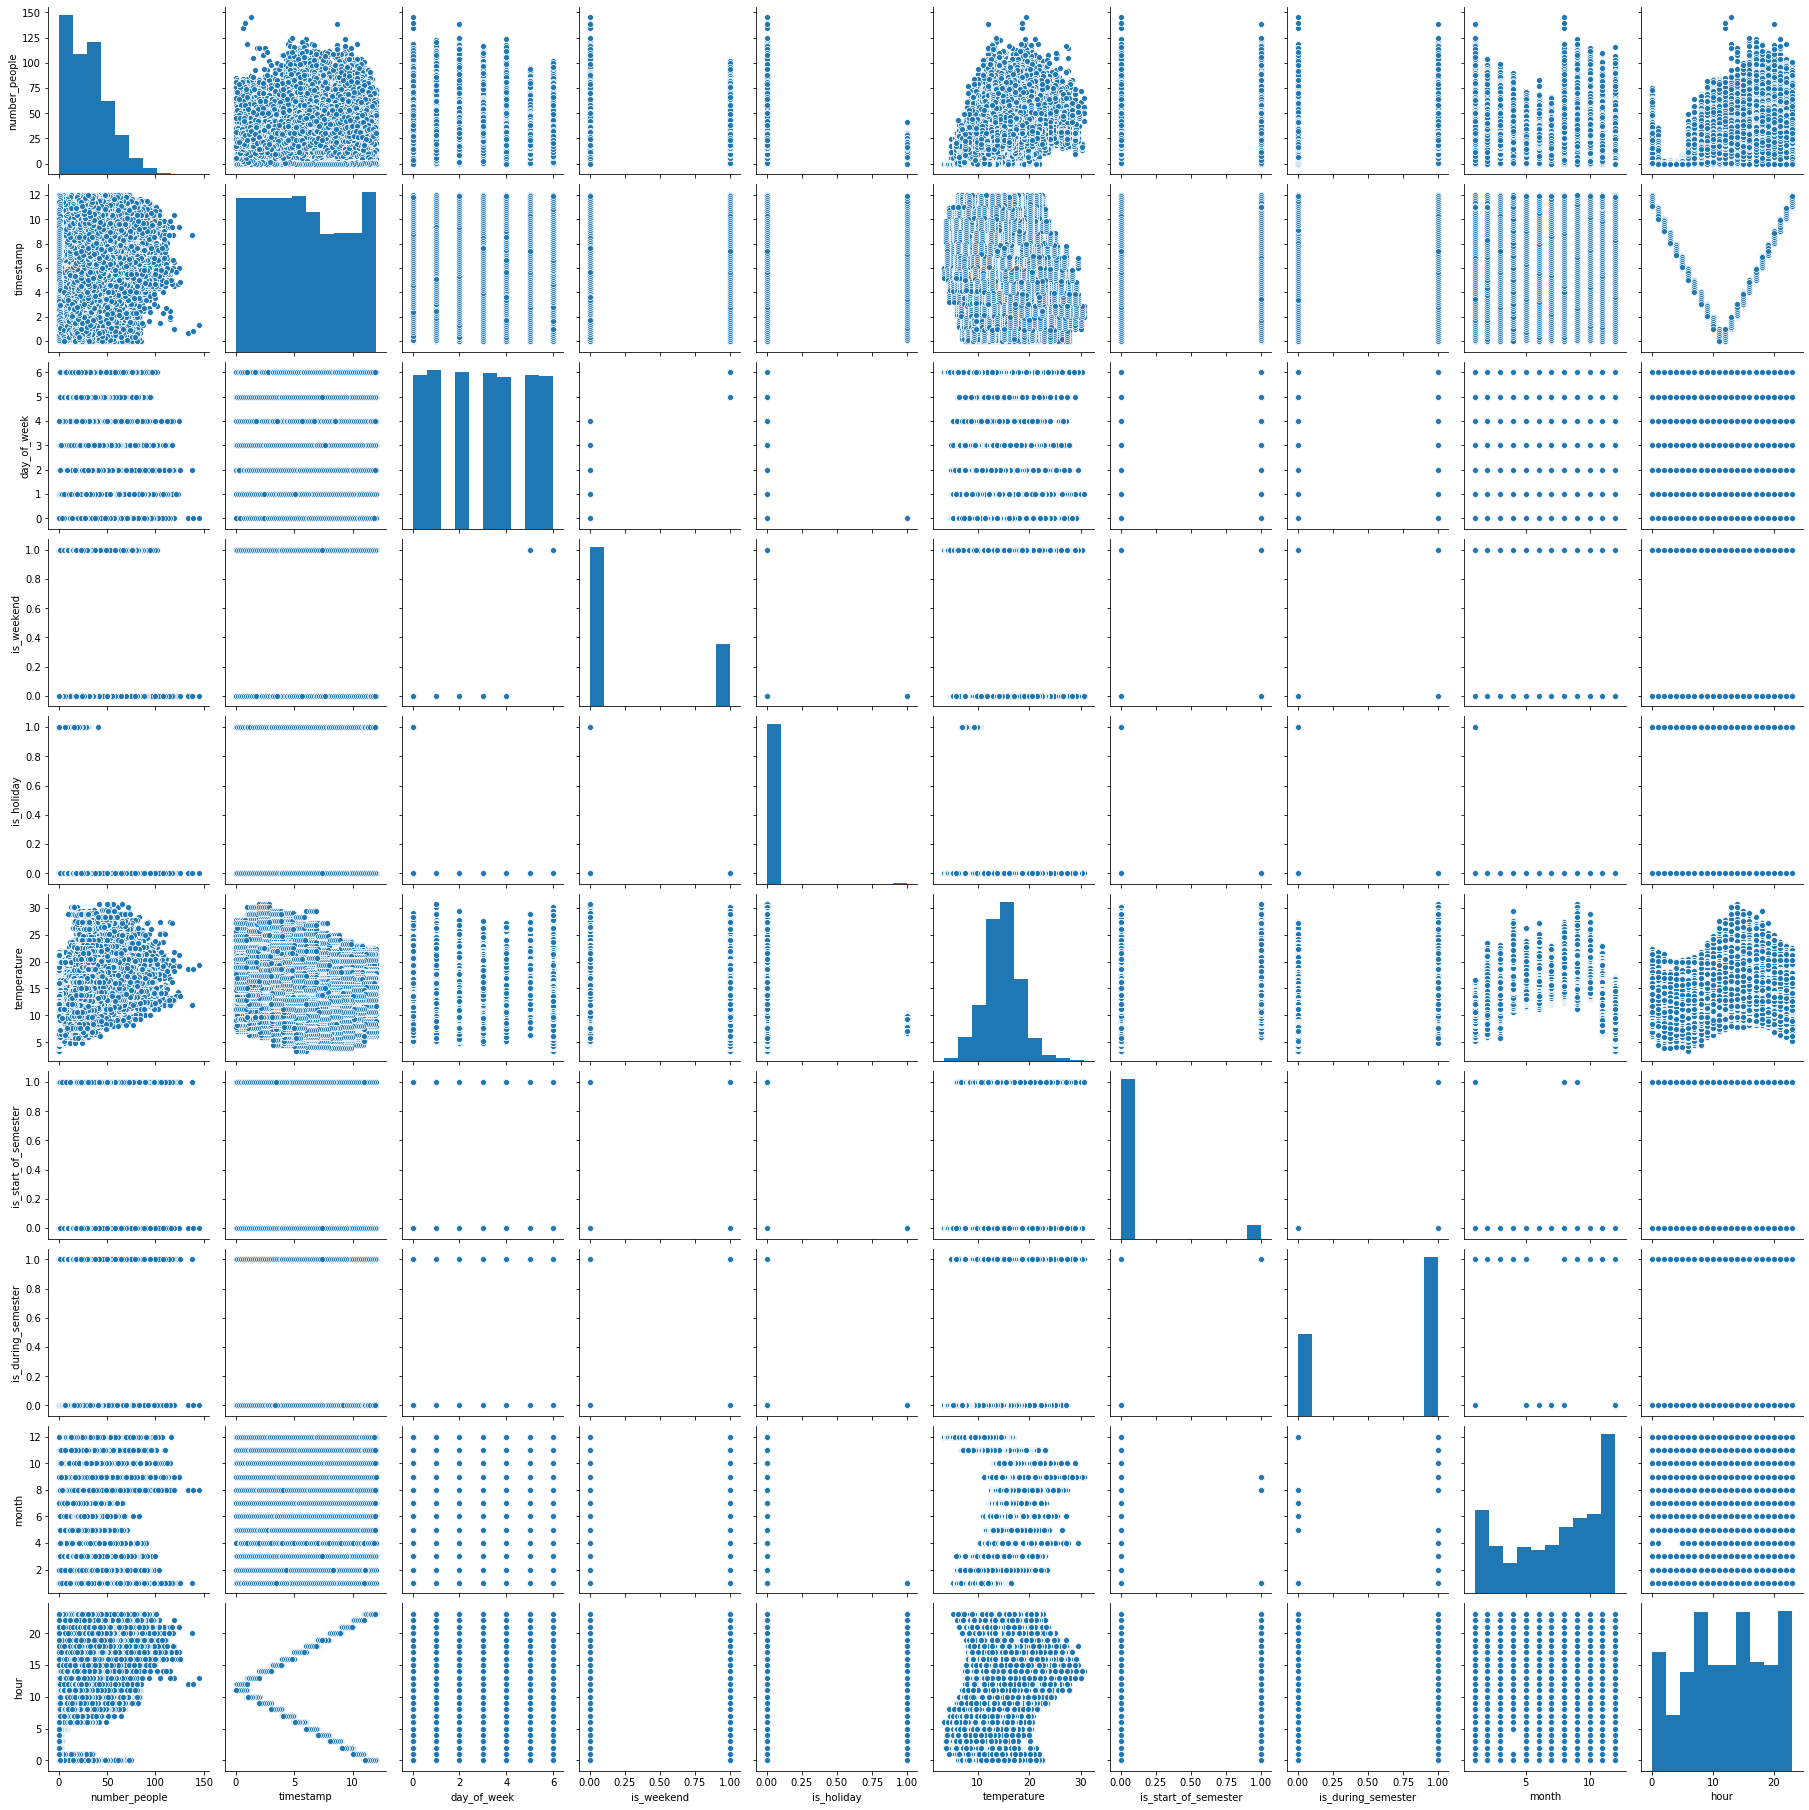

In [126]:
plt.figsize=(25,25)
sns.pairplot(df)

In [37]:
# from pandas.plotting import scatter_matrix
# attr = ['number_people','day_of_week','temprature','month','is_weekend','is_holiday']
# scatter_matrix(df[attr], figsize=(15,15))

**TASK: Now analyse scatter plots between `number_people` and all other attributes using a `for loop` to properly know what are the ideal conditions for people to come to the gym** 

In [127]:
# scatter_matrix(df[['number_people', 'timestamp']], figsize=(15,15))
plt(df,x='number_people',y='timestamp',bar='scatter')

TypeError: 'module' object is not callable

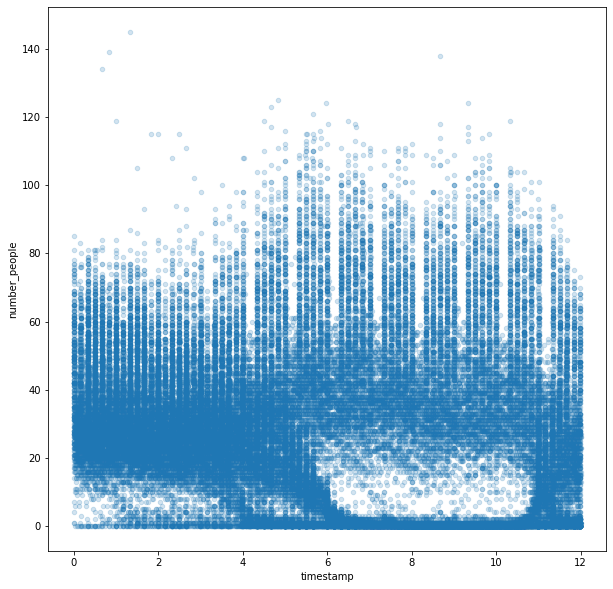

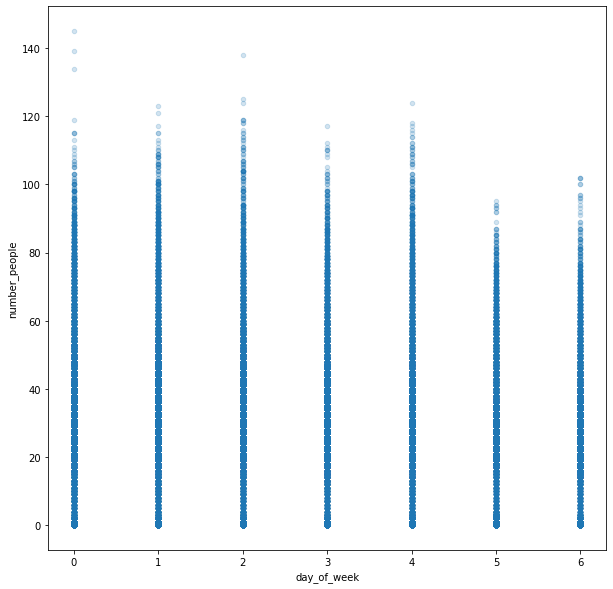

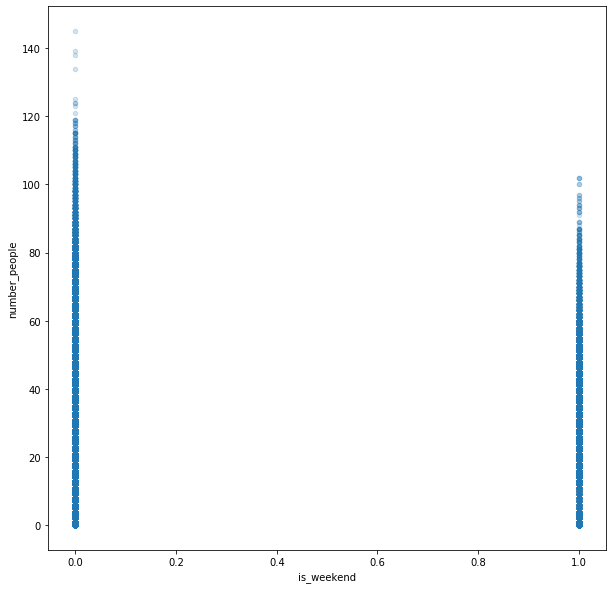

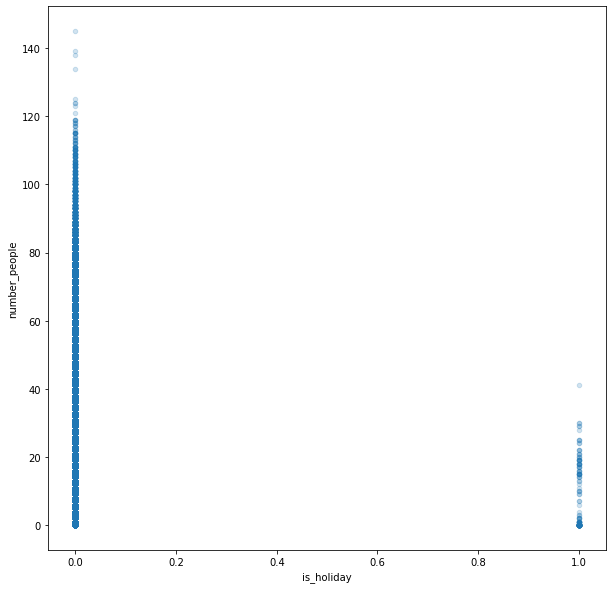

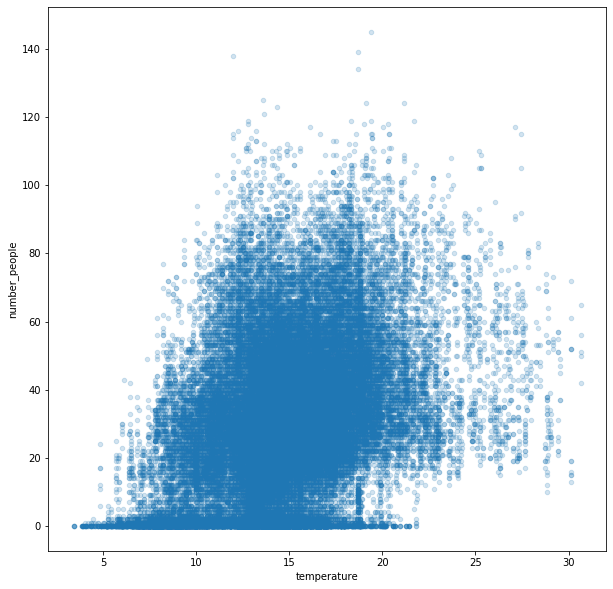

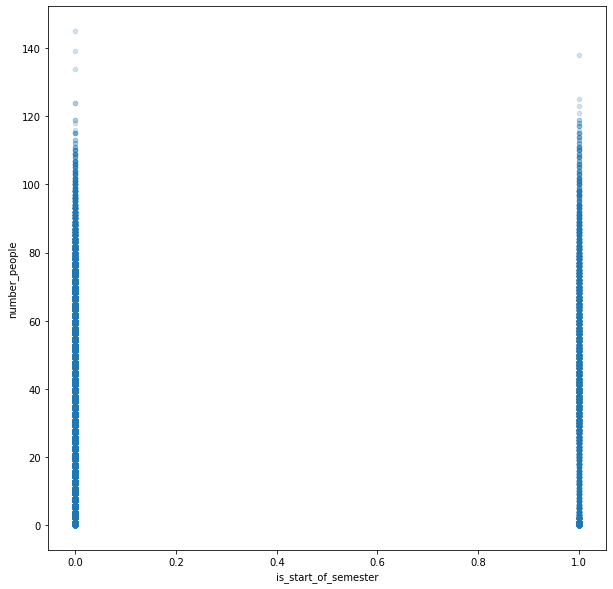

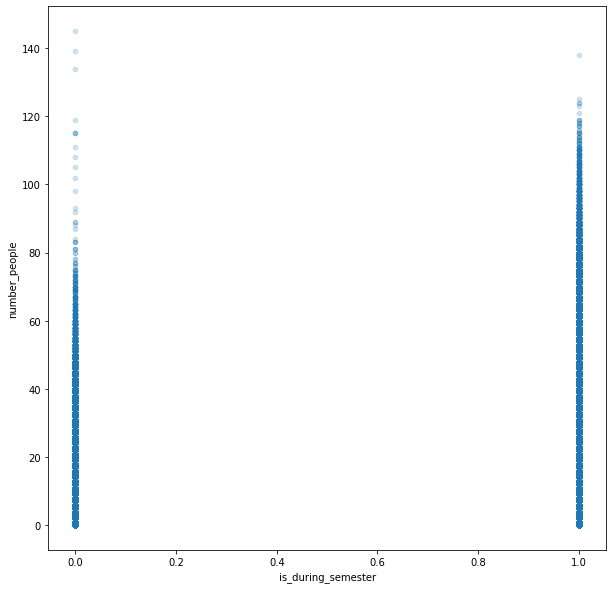

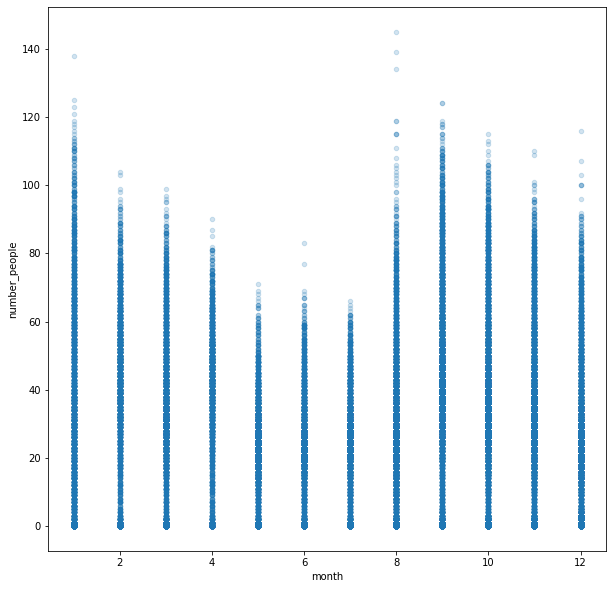

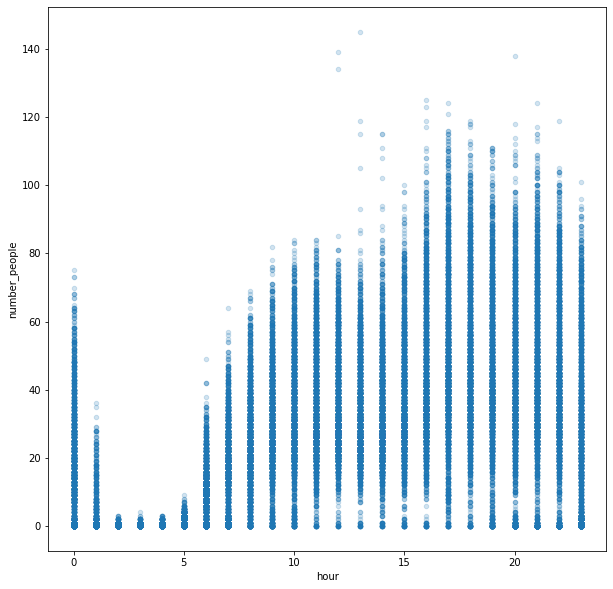

In [58]:
attr = list(df.columns)
y = attr.pop(0)

for i in attr:
    df.plot.scatter(x=i, y=y, figsize = (10,10),alpha = 0.2);


**Analyse the plots and understand :**
1. **At what time , temperature , week of the day more people come in?**
        
2. **Whether people like to come to the gym in a holiday or a weekend or they prefer to come to gym during working days?**
       
3. **Which month is most preferable for people to come to the gym?** 

## 
On weekdays no. of people coming to gym is more(Monday count is more compared to others)
Most people prefer to come to gym when temprature between 5-30 degrees
Start and During of semesters are not impacting much on the crowd
Crowd is less in the months mar-jul
Crowd has been observed less in holidays
On weekends, Gym has slightly less people 

- **Distribution Plots**

**TASK : Plot individual `distplot()` for `temperature` and `number_people` to check out the individual distribution of the attributes** 

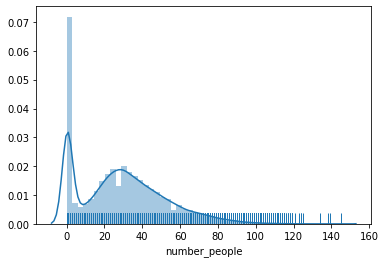

In [128]:
sns.distplot(df['number_people'],rug=True);
# dist_col=['number_people','temperature']

# for i in dist_col:
#     a = sns.distplot(df[i])
    


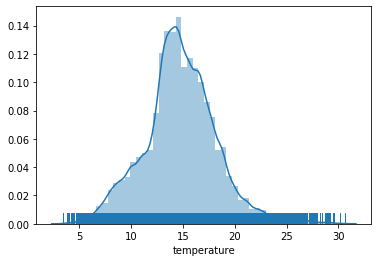

In [129]:
sns.distplot(df['temperature'],rug=True);


### `2.2` Correlation Matrix

**TASK : Plot a correlation matrix and make it more understandable using `sns.heatmap`**

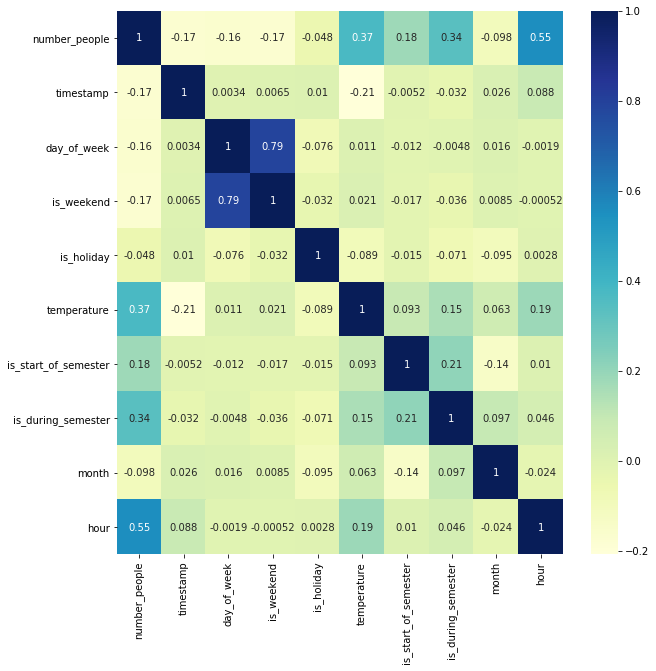

In [130]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

**Analyse the correlation matrix and understand the different dependencies of attributes on each other** 

Features(tempreture,is_dusring_semester,hour) has strong corlations with Number of People




## `3.` Processing : 

### `3.1` One hot encoding :
One hot encoding certain attributes to not give any ranking/priority to any instance

**TASK: One Hot Encode following attributes `month` , `hour` , `day of week`**

In [131]:
cols = ['day_of_week','hour','month']
df = pd.get_dummies(df,columns=cols)


In [132]:
df.head()

,number_people,timestamp,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,day_of_week_0,day_of_week_1,day_of_week_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,37,5.003056,0,0,22.088889,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,45,5.337222,0,0,22.088889,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,40,5.504167,0,0,22.088889,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,44,5.671111,0,0,22.088889,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,45,5.838056,0,0,22.088889,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [133]:
# df.values[:, 1:2]
# df.values[:, 2:6]
# df.values[1:5, 0:4]

### `3.2` Feature Scaling :
Some attributes ranges are ver different compared to other values and during PCA implementation this might give a problem thus you need to standardise some of the attributes

**TASK: Using `StandardScaler()` , standardise `temperature` and `timestamp`**

In [148]:
## You can use two individual scalers one for temperature and other for timestamp
## you can use an array type data=df.values and standradise data then split data into X and y
from sklearn.preprocessing import StandardScaler

data=df.values
scaler1 = StandardScaler()
data[:,1:2] = scaler1.fit_transform(data[:,1:2])    

scaler2 = StandardScaler()
data[:,4:5] = scaler2.fit_transform(data[:,4:5])    



In [149]:
df.head()


,number_people,timestamp,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,day_of_week_0,day_of_week_1,day_of_week_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,37,5.003056,0,0,22.088889,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,45,5.337222,0,0,22.088889,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,40,5.504167,0,0,22.088889,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,44,5.671111,0,0,22.088889,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,45,5.838056,0,0,22.088889,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## `4.` Splitting the dataset : 

**TASK : Split the dataset into dependent and independent variables and name them y and X respectively** 

In [150]:
x = data[:,1:] 
y = data[:,0]

**TASK : Split the X ,y into training and test set**

In [151]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


## `5.` Principal Component Analysis 

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

**How does it work? :**

- First, a matrix is calculated that summarizes how our variables all relate to one another.

- Secondly , The matrix is broken down into two separate components: direction and magnitude. so its easy to understand the “directions” of the data and its “magnitude” (or how “important” each direction is). The photo below, displays the two main directions in this data: the “red direction” and the “green direction.” In this case, the “red direction” is the more important one as given how the dots are arranged, “red direction”  comprises most of the data and thus is s more important than the “green direction” (Hint: Think of  What would fitting a line of best fit to this data look like?)


<img src="https://miro.medium.com/max/832/1*P8_C9uk3ewpRDtevf9wVxg.png">

- Then the data is transformed to align with these important directions (which are combinations of our original variables). The photo below is the same exact data as above, but transformed so that the x- and y-axes are now the “red direction” and “green direction.”  What would the line of best fit look like here?

<img src="https://miro.medium.com/max/1400/1*V3JWBvxB92Uo116Bpxa3Tw.png">

So PCA tries to find the most important directions in which most of the data is spread and thus reduces it to those components thereby reducing the number of attributes to train and increasing computational speed. A 3D example is given below : 

<img src="https://miro.medium.com/max/1024/1*vfLvJF8wHaQjDaWv6Mab2w.png">

As you can see above a 3D plot is reduced to a 2d plot still retaining most of the data

**Now that you have understood this , lets try to implement it** 

**TASK : Print the PCA fit_transform of X(independent variables)**

In [162]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(x)

array([[ 1.61428088e+00,  1.22732762e+00, -2.43591352e-01, ...,
         1.47449226e-15, -1.38822471e-15,  4.09381027e-16],
       [ 1.54939077e+00,  1.29428477e+00, -2.44467873e-01, ...,
         2.58405531e-14,  9.10486228e-15, -9.42587911e-15],
       [ 1.51697268e+00,  1.32773551e+00, -2.44905768e-01, ...,
        -1.31393531e-15,  1.44278210e-15, -2.28797077e-15],
       ...,
       [-4.37133199e-01,  1.04127634e-01,  8.44909053e-01, ...,
         2.03521812e-18,  7.72071649e-18, -3.50025356e-17],
       [-4.69874926e-01,  1.37912329e-01,  8.44466786e-01, ...,
        -2.83387656e-17, -4.17247849e-18, -8.42451167e-18],
       [-5.02454833e-01,  1.71530050e-01,  8.44026704e-01, ...,
        -2.99908456e-17,  5.08810977e-17, -1.72734063e-17]])

**TASK : Get covariance using `get_covariance()`**

In [163]:
pca.get_covariance()

array([[ 1.00001608e+00,  2.94638624e-03,  5.24874895e-04, ...,
         1.49752379e-03, -7.87382264e-04,  3.47574559e-04],
       [ 2.94638624e-03,  2.02857909e-01, -7.27839292e-04, ...,
         2.64109045e-03,  4.46953944e-04, -3.86286015e-04],
       [ 5.24874895e-04, -7.27839292e-04,  2.56643003e-03, ...,
        -3.00569904e-04, -2.94197690e-04, -3.09383421e-04],
       ...,
       [ 1.49752379e-03,  2.64109045e-03, -3.00569904e-04, ...,
         1.03170620e-01, -1.33565751e-02, -1.40460073e-02],
       [-7.87382264e-04,  4.46953944e-04, -2.94197690e-04, ...,
        -1.33565751e-02,  1.01266522e-01, -1.37482258e-02],
       [ 3.47574559e-04, -3.86286015e-04, -3.09383421e-04, ...,
        -1.40460073e-02, -1.37482258e-02,  1.05783993e-01]])

**TASK : Get explained variance using `explained_variance_ratio`**

In [164]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.40914216e-01, 1.62250689e-01, 6.63635753e-02, 5.29801936e-02,
       2.80032445e-02, 2.76531337e-02, 2.73517451e-02, 2.71657114e-02,
       2.69965952e-02, 2.38852889e-02, 2.18897838e-02, 1.97070936e-02,
       1.77178307e-02, 1.52831128e-02, 1.32353841e-02, 1.27074540e-02,
       1.22128461e-02, 1.16550699e-02, 9.07258990e-03, 9.03866541e-03,
       8.91912369e-03, 8.76677662e-03, 8.71206507e-03, 8.65668753e-03,
       8.64786105e-03, 8.62761938e-03, 8.61453974e-03, 8.61143499e-03,
       8.60477132e-03, 8.59664993e-03, 8.58816454e-03, 8.57891452e-03,
       8.55976868e-03, 8.54678590e-03, 8.51572781e-03, 8.16987593e-03,
       7.68603484e-03, 6.21774678e-03, 5.52423950e-03, 4.70667586e-03,
       4.61547574e-03, 4.30281087e-03, 2.63500080e-03, 4.58157854e-04,
       5.28683077e-05, 4.75119516e-32, 4.98261034e-33, 2.50969238e-33,
       2.01775660e-33])

**TASK : Plot a bar graph of `explained variance`**

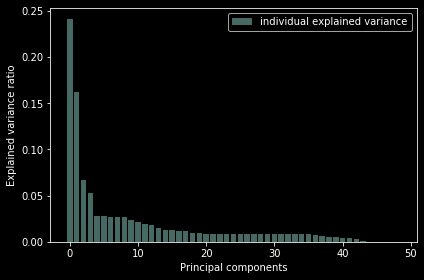

In [169]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(49), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
 

**Analyse the plot and estimate how many componenets you want to keep**

**TASK : Make a `PCA()` object with n_components =20 and fit-transform in the dataset (X) and assign to a new variable `X_new`**

In [170]:
pca = PCA(n_components=20)
x_new = pca.fit_transform(x)
x_new

array([[ 1.61428092,  1.22732433, -0.24355709, ...,  0.1654646 ,
         0.20454717, -0.01088691],
       [ 1.5493908 ,  1.29428148, -0.2444335 , ...,  0.16638206,
         0.20456017, -0.01133755],
       [ 1.51697272,  1.32773222, -0.24487134, ...,  0.1668404 ,
         0.20456667, -0.01156269],
       ...,
       [-0.43713303,  0.10412819,  0.84486636, ..., -0.28843081,
        -0.10293671,  0.00241249],
       [-0.46987476,  0.13791288,  0.84442414, ..., -0.28796789,
        -0.10293015,  0.00218511],
       [-0.50245467,  0.1715306 ,  0.84398412, ..., -0.28750726,
        -0.10292362,  0.00195885]])

Now , `X_new` is the dataset for PCA

**TASK : Get Covariance using `get_covariance`**

In [171]:
pca.get_covariance()

array([[ 1.00129429e+00,  2.94559047e-03,  5.29944863e-04, ...,
         1.48459456e-03, -7.58886553e-04,  3.84101010e-04],
       [ 2.94559047e-03,  2.15812204e-01, -6.63917081e-04, ...,
         2.62361637e-03,  4.26452936e-04, -3.88643052e-04],
       [ 5.29944863e-04, -6.63917081e-04,  3.15477610e-02, ...,
        -3.78341263e-04, -2.75586959e-04, -1.77377701e-05],
       ...,
       [ 1.48459456e-03,  2.62361637e-03, -3.78341263e-04, ...,
         1.06505301e-01, -1.00764193e-02, -1.15201993e-02],
       [-7.58886553e-04,  4.26452936e-04, -2.75586959e-04, ...,
        -1.00764193e-02,  1.04544998e-01, -1.11898685e-02],
       [ 3.84101010e-04, -3.88643052e-04, -1.77377701e-05, ...,
        -1.15201993e-02, -1.11898685e-02,  1.08349980e-01]])

**TASK : Get the explained variance using `explained_variance_ratio`**

In [172]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.24091422, 0.16225069, 0.06636357, 0.05298019, 0.02800309,
       0.02765284, 0.02735169, 0.02716542, 0.02699635, 0.0238847 ,
       0.02188959, 0.01970329, 0.01770312, 0.01526952, 0.01314829,
       0.0126273 , 0.01212055, 0.01144525, 0.0089852 , 0.00894502])

**TASK : Plot bar plot of `exlpained variance`**

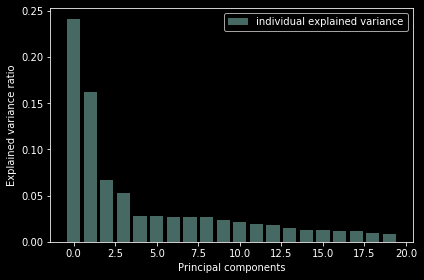

In [173]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(20), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
 

## `6.` Modelling : Random Forest

To understand Random forest classifier , lets first get a brief idea about Decision Trees in general. Decision Trees are very intuitive and at everyone have used this knowingly or unknowingly at some point . Basically the model keeps sorting them into categories forming a large tree by responses of some questons (decisions) and thats why its called decision tree. An image example would help understand it better :

<img src="https://camo.githubusercontent.com/960e89743476577bd696b3ac16885cf1e1d19ad1/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f313030302f312a4c4d6f4a6d584373516c6369475445796f534e3339672e6a706567">

`Random Forest` : Random forest, like its name implies, consists of a large number of individual decision trees that operate as an [ensemble](https://en.wikipedia.org/wiki/Ensemble_learning) . Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

<img src="https://camo.githubusercontent.com/30aec690ddc10fa0ae5d3135d0c7a6b745eb5918/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f313030302f312a56484474566144504e657052676c49417637324246672e6a706567">

The fundamental concept is large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models. Since this dataset has very low correlation between attributes , random forest can be a good option.

In this section you'll have to make a random forest model and train it on both without PCA dataset and with PCA datset to analyse the differences

### `6.1` Random Forest Without PCA


**TASK : Make a random forest model and train it on without PCA training set**

In [174]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [224]:
estimators = np.arange(10,200,10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
#     print(f" Start for n = {n} at {datetime.datetime.now()} ")
    model.fit(x_train, y_train)
#     print(f" Training completed for n = {n} at {datetime.datetime.now()} ")
    scores.append(model.score(x_test, y_test))
#     print(f" Scores recorded for n = {n} at {datetime.datetime.now()} ")
print(scores)    

# model.set_params(n_estimators=10)
# model.fit(x_train, y_train)
# scores.append(model.score(x_test, y_test))

 Start for n = 10 at 2020-06-08 13:35:18.940710 
 Training completed for n = 10 at 2020-06-08 13:35:24.585768 
 Scores recorded for n = 10 at 2020-06-08 13:35:24.661552 
 Start for n = 20 at 2020-06-08 13:35:24.661552 
 Training completed for n = 20 at 2020-06-08 13:35:34.914658 
 Scores recorded for n = 20 at 2020-06-08 13:35:35.129159 
 Start for n = 30 at 2020-06-08 13:35:35.130140 
 Training completed for n = 30 at 2020-06-08 13:35:50.519658 
 Scores recorded for n = 30 at 2020-06-08 13:35:50.729987 
 Start for n = 40 at 2020-06-08 13:35:50.729987 
 Training completed for n = 40 at 2020-06-08 13:36:14.703664 
 Scores recorded for n = 40 at 2020-06-08 13:36:15.017180 
 Start for n = 50 at 2020-06-08 13:36:15.018114 
 Training completed for n = 50 at 2020-06-08 13:36:46.828294 
 Scores recorded for n = 50 at 2020-06-08 13:36:47.295943 
 Start for n = 60 at 2020-06-08 13:36:47.295943 
 Training completed for n = 60 at 2020-06-08 13:37:24.524570 
 Scores recorded for n = 60 at 2020-06-

**TASK : Make a plot between `n_estimator` and `scores` to properly get the best number of estimators**

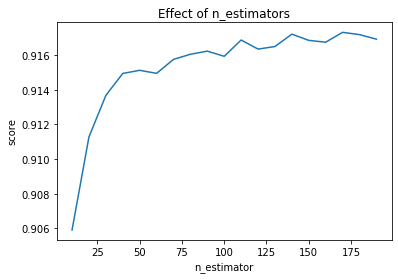

In [225]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

### `6.2` Random Forest With PCA

**TASK : Split the your dataset with PCA into training and testing set using `train_test_split`** 

In [226]:
from sklearn.model_selection import train_test_split
### START CODE HERE  :
x_ptrain,x_ptest,y_ptrain,y_ptest = train_test_split(x_new,y, test_size=0.25, random_state=42)
x_ptrain.shape

(46638, 20)

**TASK : Make a random forest model called `model_pca` and fit it into the new X_train and y_train and then print out the random forest scores for dataset with PCA applied to it**

In [227]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model_pca = RandomForestRegressor()

In [229]:
estimators_pca = np.arange(10,200,10)
scores_pca = []
for n in estimators_pca:
    model_pca.set_params(n_estimators=n)
#     print(f" Start for n = {n} at {datetime.datetime.now()} ")
    model_pca.fit(x_ptrain, y_ptrain)
#     print(f" Training completed for n = {n} at {datetime.datetime.now()} ")
    scores_pca.append(model_pca.score(x_ptest, y_ptest))
#     print(f" Scores recorded on Test for n = {n} at {datetime.datetime.now()} ")
print(scores_pca)    

# model.set_params(n_estimators=10)
# model.fit(x_train, y_train)
# scores.append(model.score(x_test, y_test))

 Start for n = 10 at 2020-06-08 13:55:48.326444 
 Training completed for n = 10 at 2020-06-08 13:55:58.314766 
 Scores recorded on Test for n = 10 at 2020-06-08 13:55:58.367626 
 Start for n = 20 at 2020-06-08 13:55:58.367626 
 Training completed for n = 20 at 2020-06-08 13:56:17.386866 
 Scores recorded on Test for n = 20 at 2020-06-08 13:56:17.492583 
 Start for n = 30 at 2020-06-08 13:56:17.492583 
 Training completed for n = 30 at 2020-06-08 13:56:46.052275 
 Scores recorded on Test for n = 30 at 2020-06-08 13:56:46.381693 
 Start for n = 40 at 2020-06-08 13:56:46.381693 
 Training completed for n = 40 at 2020-06-08 13:57:24.594636 
 Scores recorded on Test for n = 40 at 2020-06-08 13:57:24.800092 
 Start for n = 50 at 2020-06-08 13:57:24.801086 
 Training completed for n = 50 at 2020-06-08 13:58:12.404932 
 Scores recorded on Test for n = 50 at 2020-06-08 13:58:12.670195 
 Start for n = 60 at 2020-06-08 13:58:12.671193 
 Training completed for n = 60 at 2020-06-08 13:59:09.675852 

**TASK : Make a plot between `n_estimator` and `score` and find the best parameter** 

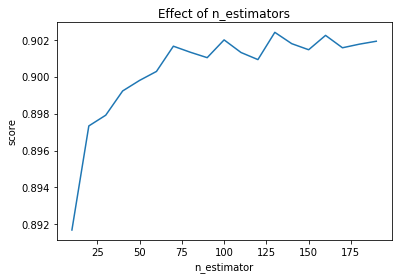

In [230]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators_pca, scores_pca)

This completes modelling and now its time to analyse your models

## `7.` Conclusion

Analyse the plots and find the best n_estimator. you can also hypertune other parameter using GridSearchCV or Randomised search. Also understand whether using PCA was beneficial or not , if not try to justify it. 